In [1]:
import sqlite3
import pandas as pd

# function to query db and return a df with lowercase columns, in later steps
def get_df(query):
    connection = sqlite3.connect('database/hotel.db')
    df = pd.read_sql_query(query, connection)
    df.columns = df.columns.str.lower()
    connection.close()
    return df

# get all data from hotel table
connection = sqlite3.connect('database/hotel.db')
hotel_df = pd.read_sql_query('select * from hotel', connection)

# rename dataframe columns to lowercase. Pandas is case sensitive
hotel_df.columns = hotel_df.columns.str.lower()
print(hotel_df.columns)
hotel_df.head()

Index(['id', 'url', 'name', 'address', 'latitude', 'longitude', 'altitude',
       'description', 'rating', 'reviews', 'category_rank', 'star_rating',
       'nearby_restaurants', 'nearby_attractions', 'walkers_score', 'pictures',
       'average_night_price', 'price_range_min', 'price_range_max',
       'property_amenities', 'room_features', 'room_types', 'location_rating',
       'cleanliness_rating', 'service_rating', 'value_rating', 'also_known_as',
       'formerly_known_as', 'city_location', 'number_of_rooms',
       'reviews_summary', 'reviews_keypoint_location',
       'reviews_keypoint_atmosphere', 'reviews_keypoint_rooms',
       'reviews_keypoint_value', 'reviews_keypoint_cleanliness',
       'reviews_keypoint_service', 'reviews_keypoint_amenities',
       'reviews_5_excellent', 'reviews_4_very_good', 'reviews_3_average',
       'reviews_2_poor', 'reviews_1_terrible', 'reviews_keywords',
       'scraped_timestamp', 'insert_update_timestamp'],
      dtype='object')


,id,url,name,address,latitude,longitude,altitude,description,rating,reviews,...,reviews_keypoint_service,reviews_keypoint_amenities,reviews_5_excellent,reviews_4_very_good,reviews_3_average,reviews_2_poor,reviews_1_terrible,reviews_keywords,scraped_timestamp,insert_update_timestamp
0,267437109633874,https://www.tripadvisor.com/Hotel_Review-g1877...,Regia Goito,"Via Goito 17, Rome Italy",41.906067,12.500244,0.0,Looking for a place to stay in Rome? Then look...,1.5,20,...,NA,NA,1,0,3,3,13,NA,2024-03-18 10:58:51,2024-03-18 10:58:51
1,423388210168627,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Mazza,"Largo Ettore Marchiafava, 3, Rome Italy",41.907373,12.517269,0.0,NA,4.0,5,...,NA,NA,1,4,0,0,0,NA,2024-03-18 11:41:46,2024-03-18 11:41:46
2,454371077005232,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B Casasuri,"Via Enrico Cialdini 13, 00185 Rome Italy",41.898488,12.503187,0.0,B&B Casasuri is an excellent choice for travel...,4.0,2,...,NA,NA,1,0,1,0,0,NA,2024-03-18 15:03:54,2024-03-18 15:03:54
3,492462491596955,https://www.tripadvisor.com/Hotel_Review-g1877...,Villa Faby B&B,"Via Leonida Lay, 195 Trigoria, Rome Italy",41.755265,12.472212,0.0,See why so many travelers make Villa Faby B&B ...,5.0,1,...,NA,NA,1,0,0,0,0,NA,2024-03-18 11:52:08,2024-03-18 11:52:08
4,842369030272705,https://www.tripadvisor.com/Hotel_Review-g1877...,President Gardens,"Via Rasella 148, 00187 Rome Italy",41.902439,12.487371,0.0,NA,4.0,6,...,NA,NA,4,0,0,1,1,NA,2024-03-18 12:51:50,2024-03-18 12:51:50


In [2]:
from wordcloud import WordCloud, STOPWORDS

def get_wordcloud(query, column):
    """ Generate a word cloud based on the text data in the specified column of the query result """
    # Get the data points from the database, using the provided query
    df = get_df(query)

    # Concatenate the text data from the specified column
    text = ' '.join(df[column].dropna())

    stopwords = []
    stopwords = ['hotel', 'rome', 'stay', 'stayed', 'staff', 'B&B'] + list(STOPWORDS)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, font_path='./tt-milks-script-regular.ttf').generate(text)
    return wordcloud

# to do: change color, change mask, see other parameters
# to do: save image to file, and then display it

In [3]:
query_positive_reviews = """
    select 
        r.text
    from 
        review r 
    where 
        r.language = 'en' 
        and r.rating > 3.5
    """

query_negative_reviews = """
    select
        r.text
    from
        review r
    where
        r.language = 'en'
        and r.rating < 2.5
    """

query_neutral_reviews = """
    select
        r.text
    from
        review r
    where
        r.language = 'en'
        and r.rating >= 2.5
        and r.rating <= 3.5
    """



# Generate word clouds for positive, negative, and neutral reviews
wordcloud_positive = get_wordcloud(query_positive_reviews, 'text')
wordcloud_negative = get_wordcloud(query_negative_reviews, 'text')
wordcloud_neutral = get_wordcloud(query_neutral_reviews, 'text')

Word cloud for positive reviews:


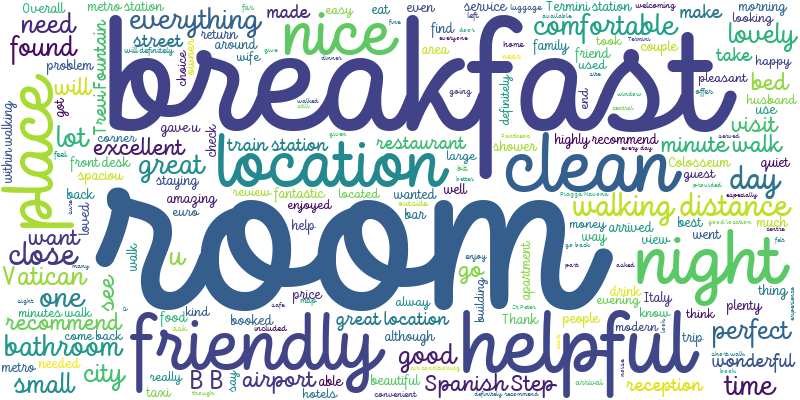

Word cloud for negative reviews:


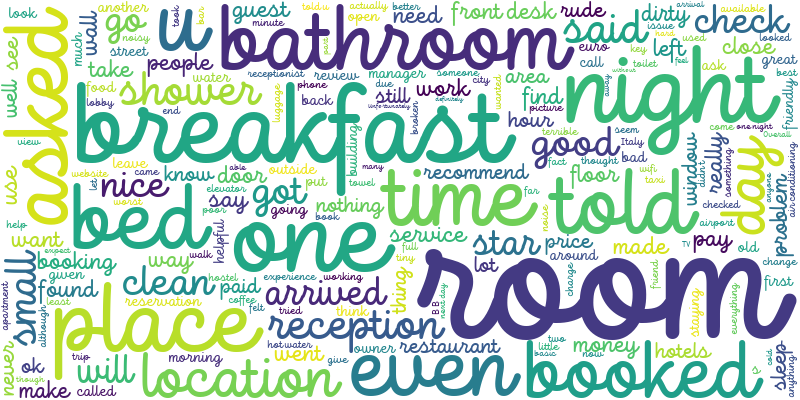

Word cloud for neutral reviews:


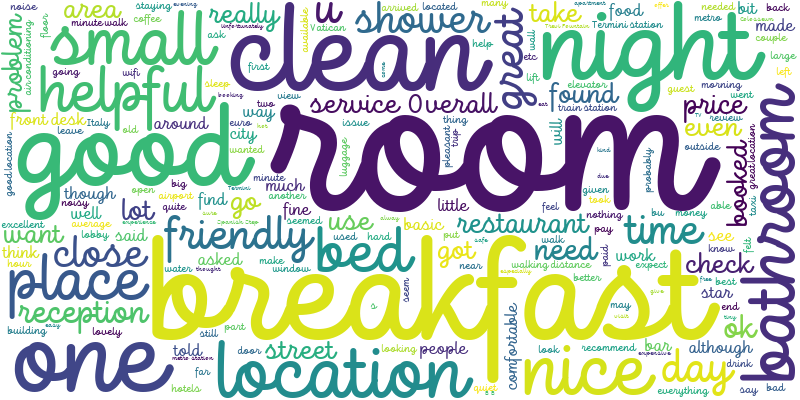

In [4]:
print('Word cloud for positive reviews:')
display(wordcloud_positive.to_image())
print('Word cloud for negative reviews:')
display(wordcloud_negative.to_image())
print('Word cloud for neutral reviews:')
display(wordcloud_neutral.to_image())

In [5]:
connection.close()
wordcloud_negative = None
wordcloud_positive = None
wordcloud_neutral = None
stopwords = None
df = None
hotel_df = None